# Testing and find a good Kumaraswamy distribution
---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as gamma_fn

class Kumaraswamy:
    def __init__(self, concentration1, concentration0):
        self.a = concentration1  
        self.b = concentration0  
    
    def prob(self, x):
        """Probability density function"""
        x = np.asarray(x)
        return self.a * self.b * (x ** (self.a - 1)) * ((1 - x ** self.a) ** (self.b - 1))
    
    def log_pdf(self, x):
        """Log probability density function"""
        x = np.asarray(x)
        return np.log(self.a * self.b) + (self.a - 1) * np.log(x) + (self.b - 1) * np.log(1 - x ** self.a)
    
    def grad_log_pdf(self, x):
        """Gradient of the log probability density function"""
        x = np.asarray(x)
        return ((self.a * self.b - 1) * x ** self.a - self.a + 1 ) / (x * (x ** self.a - 1))

    def hess_log_pdf(self, x):
        """Hessian of the log probability density function"""
        x = np.asarray(x)
        a = self.a
        b = self.b
        return -(a-1)/x**2 -a * (b-1) * ((a - 1) * x**(a - 2) + x ** (2 * a - 2)) / (1 - x**a)**2
    
    def cdf(self, x):
        """Cumulative distribution function"""
        x = np.asarray(x)
        return 1 - (1 - x ** self.a) ** self.b


### Truncated KS distribution

In [2]:
a = 0.055
r = 0.75
b = np.log2(1 - r) / np.log2(1 - 0.5 ** a)
print(b)
dist = Kumaraswamy(concentration1=a, concentration0=b)

0.4218872062110778


In [3]:
# Truncate + affine-rescale
# z = (x - eps) / (1 - 2 eps)
eps_trunc = 0.00005
# eps_trunc = 0.000000000
scale     = 1.0 - 2.0 * eps_trunc
norm_const = (dist.cdf(1 - eps_trunc) - dist.cdf(eps_trunc))

# grid in z-space (new variable living on (0,1))
z = np.linspace(1e-6, 1 - 1e-6, 2000)
x_from_z = eps_trunc + scale * z

pdf_z  = scale * dist.prob(x_from_z) / norm_const
cdf_z = (dist.cdf(x_from_z) - dist.cdf(eps_trunc)) / norm_const

log_pdf = np.log(scale / norm_const) + dist.log_pdf(x_from_z)
glog_pdf = dist.grad_log_pdf(x_from_z) * scale

hlog_pdf = dist.hess_log_pdf(x_from_z) * scale**2

Plot for supplementary figures:

In [4]:
# plotting_binary_histogram
import sys, os
from pathlib import Path
project_root = Path.cwd().parent  # from data_pipeline → SLAM_olfaction
sys.path.append(str(project_root))
output_dir = project_root / "figures" / "priors"
os.makedirs(output_dir, exist_ok=True)

KS distribution PDF

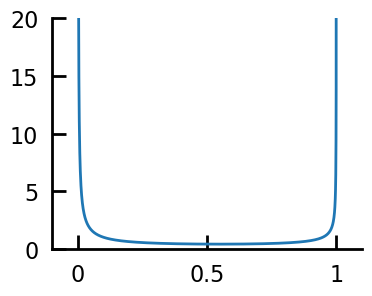

In [5]:
from mirrored_langevin_rnn.utils.visualization.styling import apply_style

fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(x_from_z, pdf_z, linewidth=2)
apply_style(ax1)
ax1.set_xlim([-0.1,1.1])
ax1.set_ylim([0, 20])
ax1.set_xticks([0, 0.5, 1])
ax1.set_xticklabels(["0", "0.5", "1"])
plt.show()
ax1.figure.savefig(output_dir / "KS_pdf.svg", bbox_inches='tight')

KS distribution CDF

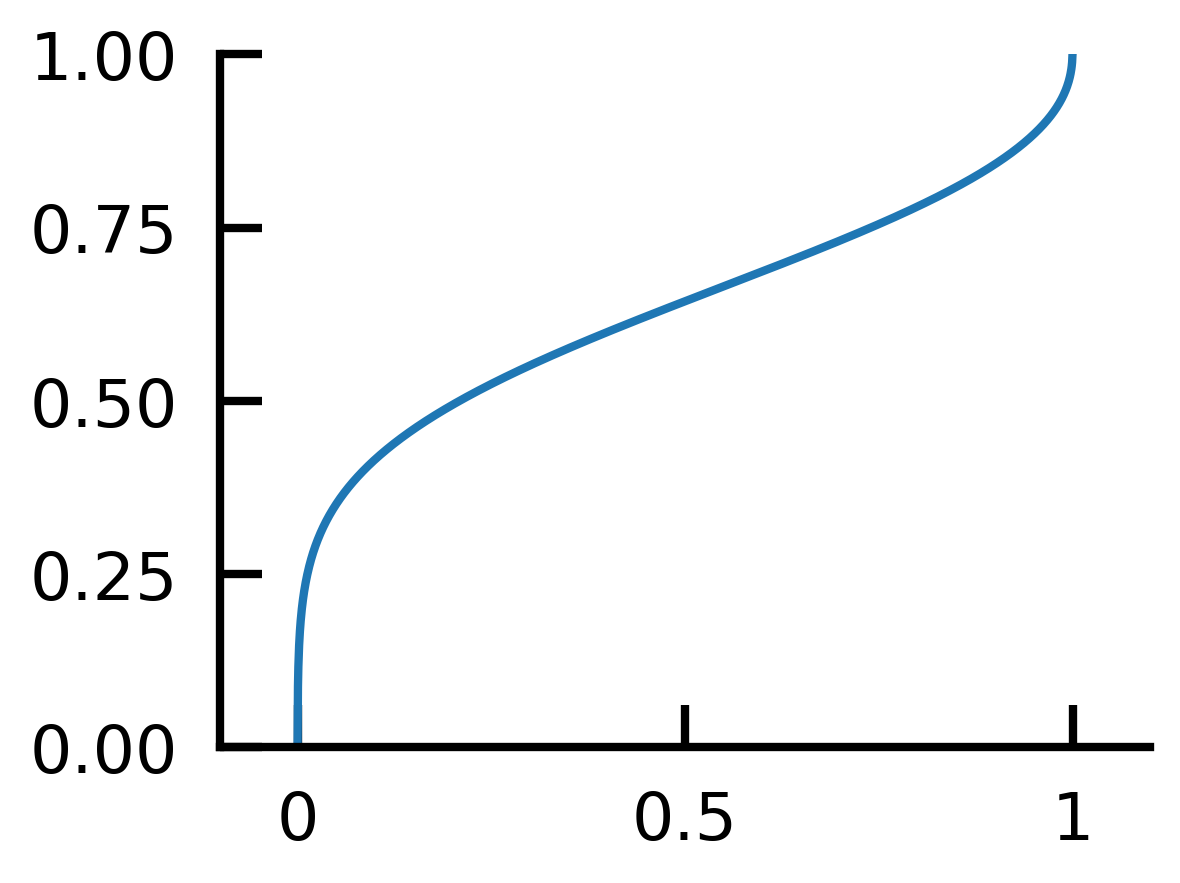

In [6]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(x_from_z, cdf_z, linewidth=2)
apply_style(ax1)
ax1.set_xlim([-0.1,1.1])
ax1.set_ylim([0, 1])
ax1.set_xticks([0, 0.5, 1])
ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "KS_cdf.svg", bbox_inches='tight')
plt.show()

log KS prior

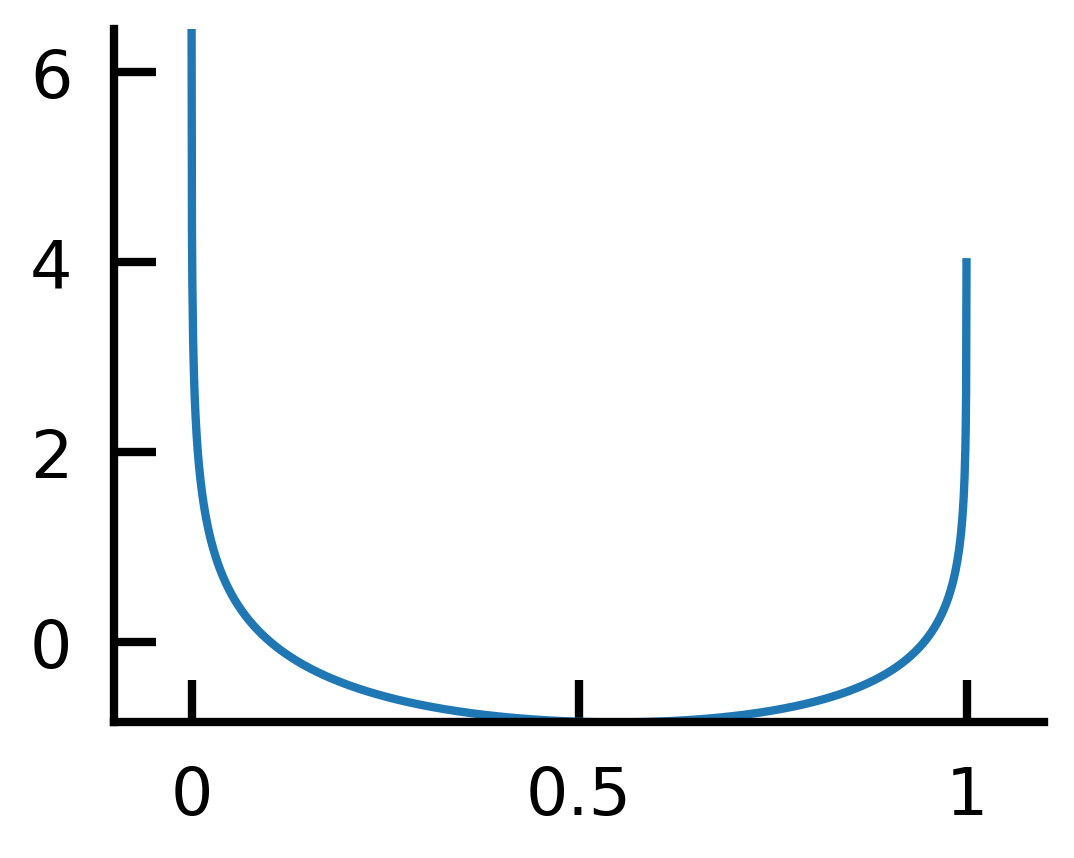

In [7]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(x_from_z, log_pdf, linewidth=2)
apply_style(ax1)
ax1.set_xlim([-0.1,1.1])
# ax1.set_ylim([-1, 1])
ax1.set_xticks([0, 0.5, 1])
ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "KS_log_pdf.svg", bbox_inches='tight')
plt.show()

grad and second derivative

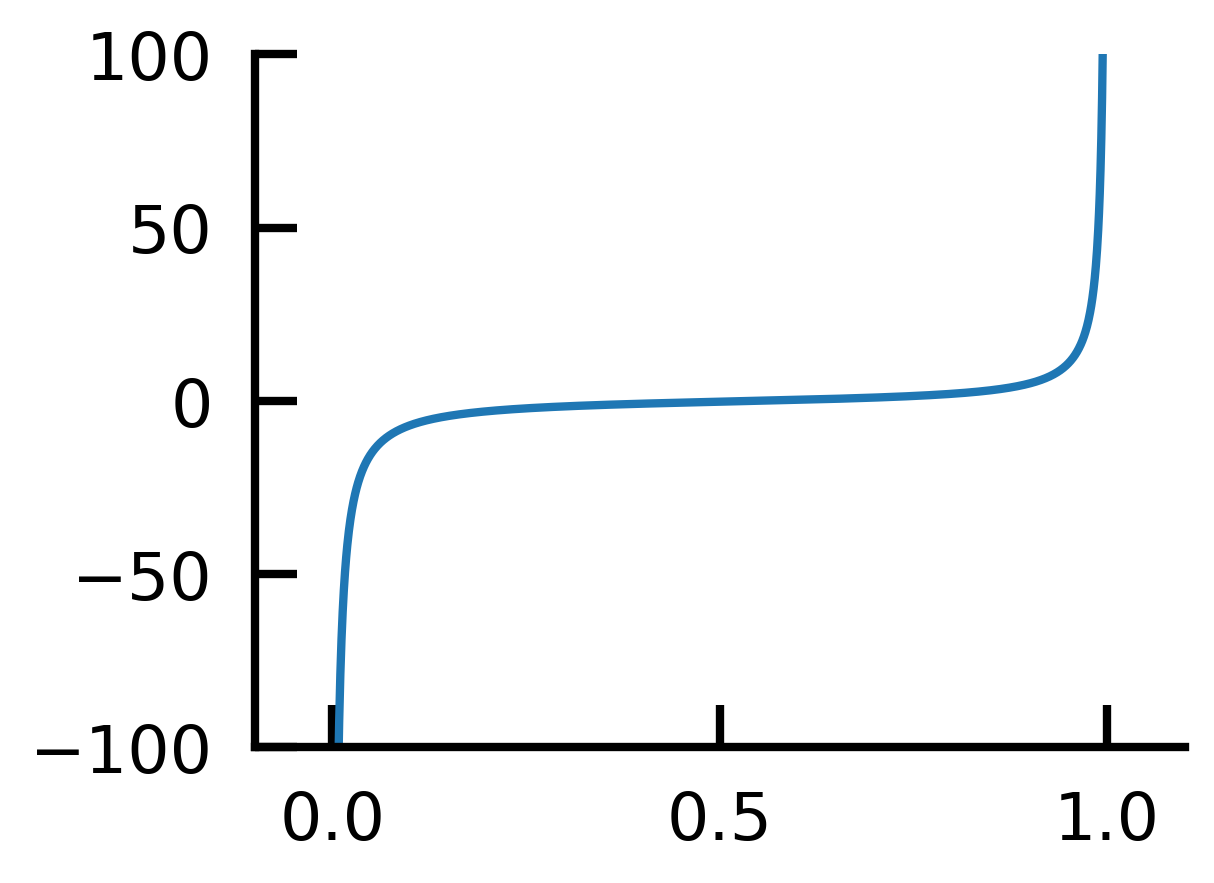

In [8]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(x_from_z, glog_pdf, linewidth=2)
apply_style(ax1)
ax1.set_xlim([-0.1,1.1])
ax1.set_ylim([-100, 100])
ax1.set_xticks([0, 0.5, 1])
# ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "KS_grad_log_pdf.svg", bbox_inches='tight')
plt.show()

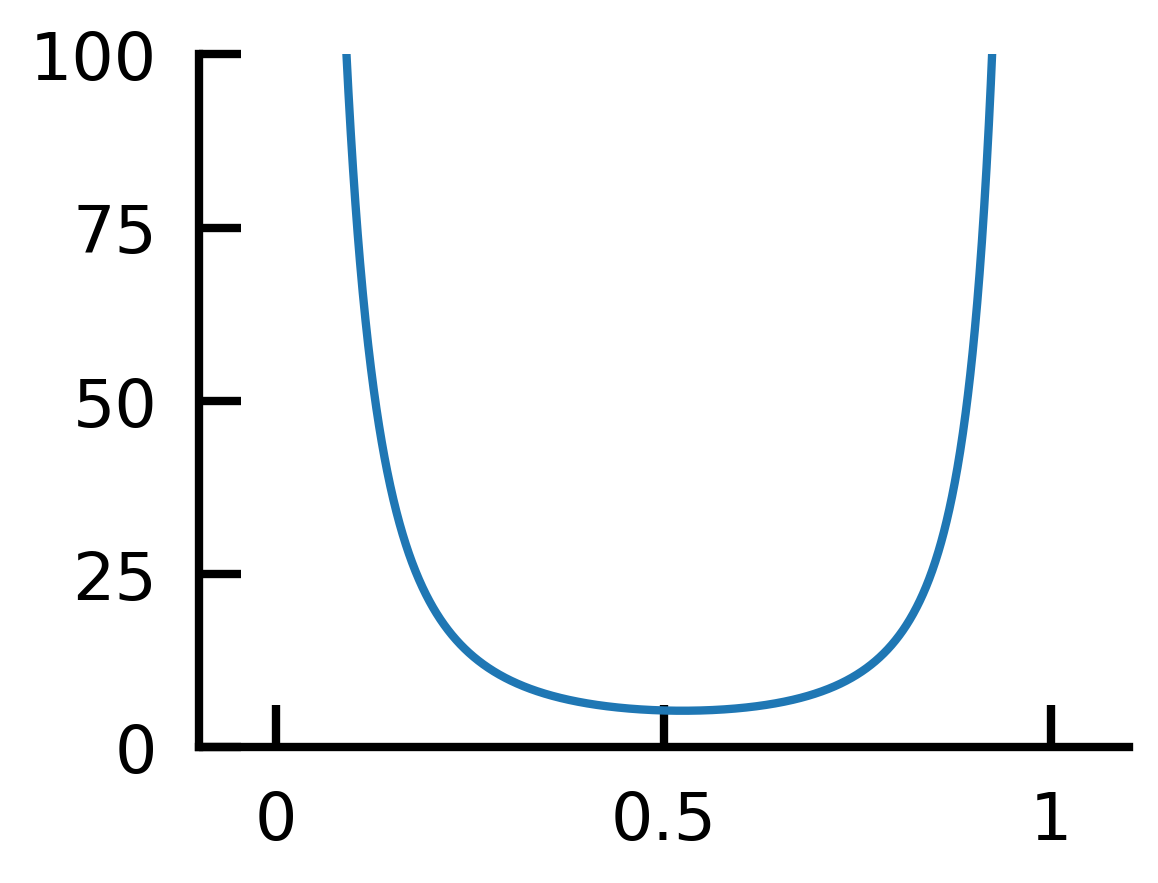

In [9]:
fig2, ax2 = plt.subplots(figsize=(4,3))
ax2.plot(x_from_z, hlog_pdf, linewidth=2)
apply_style(ax2)
ax2.set_xlim([-0.1,1.1])
ax2.set_ylim([0, 100])
ax2.set_xticks([0, 0.5, 1])
ax2.set_xticklabels(["0", "0.5", "1"])
ax2.figure.savefig(output_dir / "KS_hess_log_pdf.svg", bbox_inches='tight')
plt.show()

pdf as a function of u

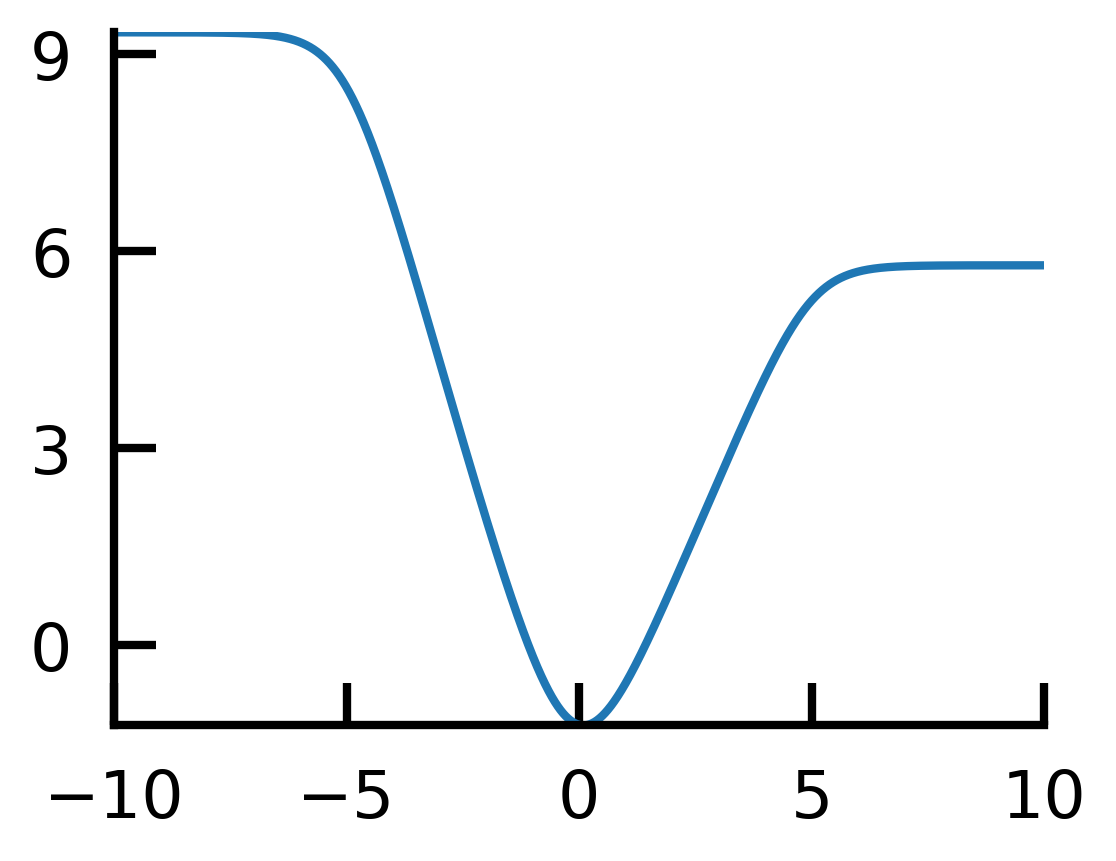

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-gamma_val * x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

u = np.linspace(-10, 10, 10000)
gamma_val = 2
z_1 = sigmoid(u)


# z = np.linspace(1e-6, 1 - 1e-6, 2000)
scale = 1.0 - 2.0 * eps_trunc
x_from_z_1 = eps_trunc + scale * z_1 # g^(-1)(z_1)

pdf_z_1  = scale * dist.prob(x_from_z_1) / norm_const
pdf_z_1 = np.log2(pdf_z_1)

pdf_u = dist.prob(z_1)
# pdf_u = np.log2(pdf_u)

fig2, ax2 = plt.subplots(figsize=(4,3))
ax2.plot(u, pdf_z_1, linewidth=2)
apply_style(ax2)
# ax2.set_xlim([-8,8])
# ax2.set_ylim([0, 100])
# ax2.set_xticks([0, 0.5, 1])
# ax2.set_xticklabels(["0", "0.5", "1"])
ax2.figure.savefig(output_dir / "KS_u_pdf.svg", bbox_inches='tight')
plt.show()


# fig2, ax2 = plt.subplots(figsize=(4,3))
# ax2.plot(u, pdf_u, linewidth=2)
# apply_style(ax2)
# # ax2.set_xlim([-8,8])
# # ax2.set_ylim([0, 100])
# # ax2.set_xticks([0, 0.5, 1])
# # ax2.set_xticklabels(["0", "0.5", "1"])
# # ax2.figure.savefig(output_dir / "KS_u_pdf.svg", bbox_inches='tight')
# plt.show()

In [11]:
glog_pdf_z_u = dist.grad_log_pdf(x_from_z_1) * scale * sigmoid_derivative(u) * gamma_val
# glog_z_u = grad_log_kuma(x_from_z_1, a, b) * scale * sigmoid_derivative(u) * gamma_val
# hlog_z_u = hess_log_kuma(x_from_z_1, a, b) * scale * (sigmoid_derivative(u) * gamma_val) ** 2 + gamma_val ** 4 * sigmoid(u) * (1 - sigmoid(u)) * (1 - 2 * sigmoid(u))
# hlog_pdf_z_u = dist.hess_log_pdf(x_from_z_1) * scale ** 2 * (sigmoid_derivative(u) * gamma_val) ** 2 + dist.grad_log_pdf(x_from_z_1) * scale * (gamma_val ** 2 * sigmoid_derivative(u) *(1 - 2 * sigmoid(u)) * (1 - sigmoid(u)))

sig = sigmoid(u)
sigp = sig * (1 - sig)                         # σ'(gamma u)
sigpp = sigp * (1 - 2 * sig)                   # σ''(gamma u)

x = x_from_z_1                                 # should be: scale * sig
term1 = dist.hess_log_pdf(x) * (scale**2) * (gamma_val**2) * (sigp**2)
term2 = dist.grad_log_pdf(x)  *  scale        * (gamma_val**2) *  sigpp

hlog_pdf_z_u = term1 + term2


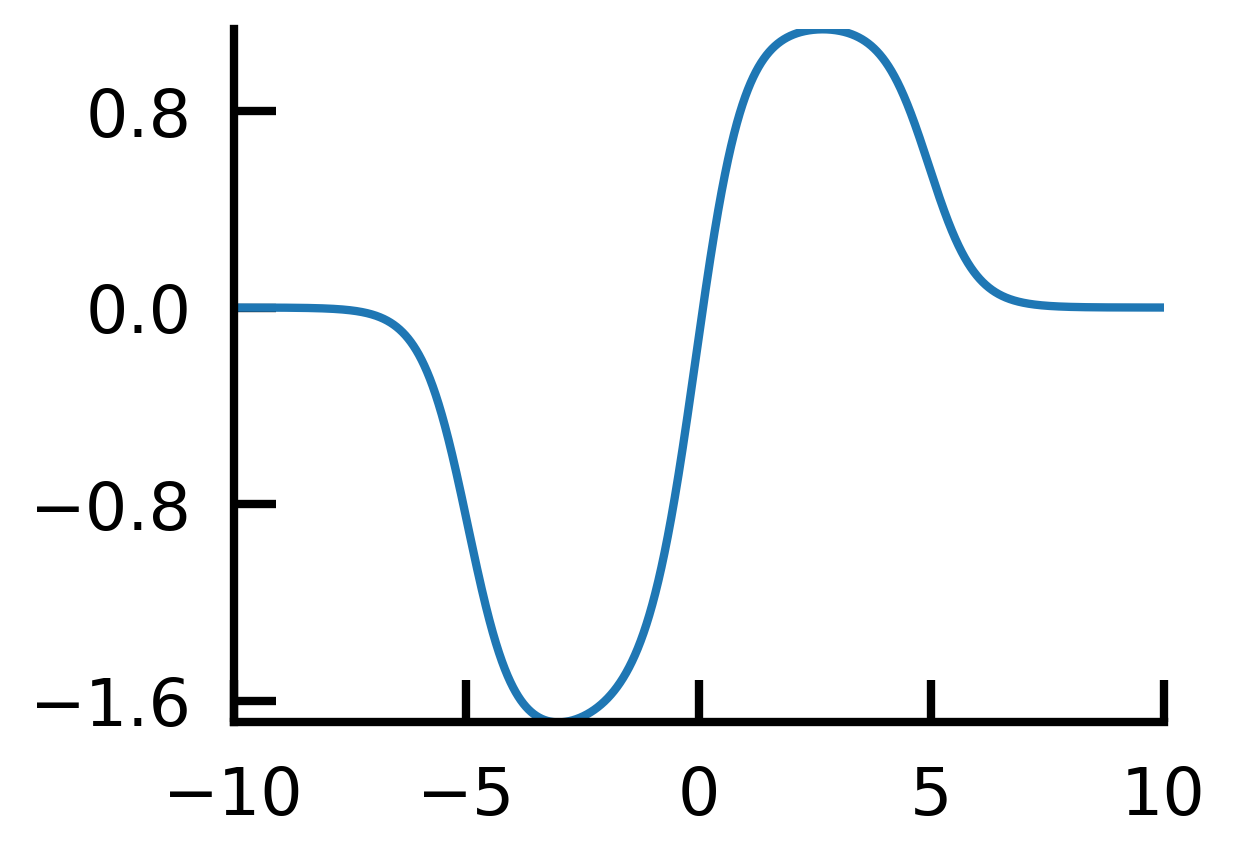

In [12]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(u, glog_pdf_z_u, linewidth=2)
apply_style(ax1)
# ax1.set_xlim([-0.1,1.1])
# ax1.set_ylim([-900, 600])
# ax1.set_xticks([0, 0.5, 1])
# ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "KS_u_grad_log_pdf.svg", bbox_inches='tight')
plt.show()

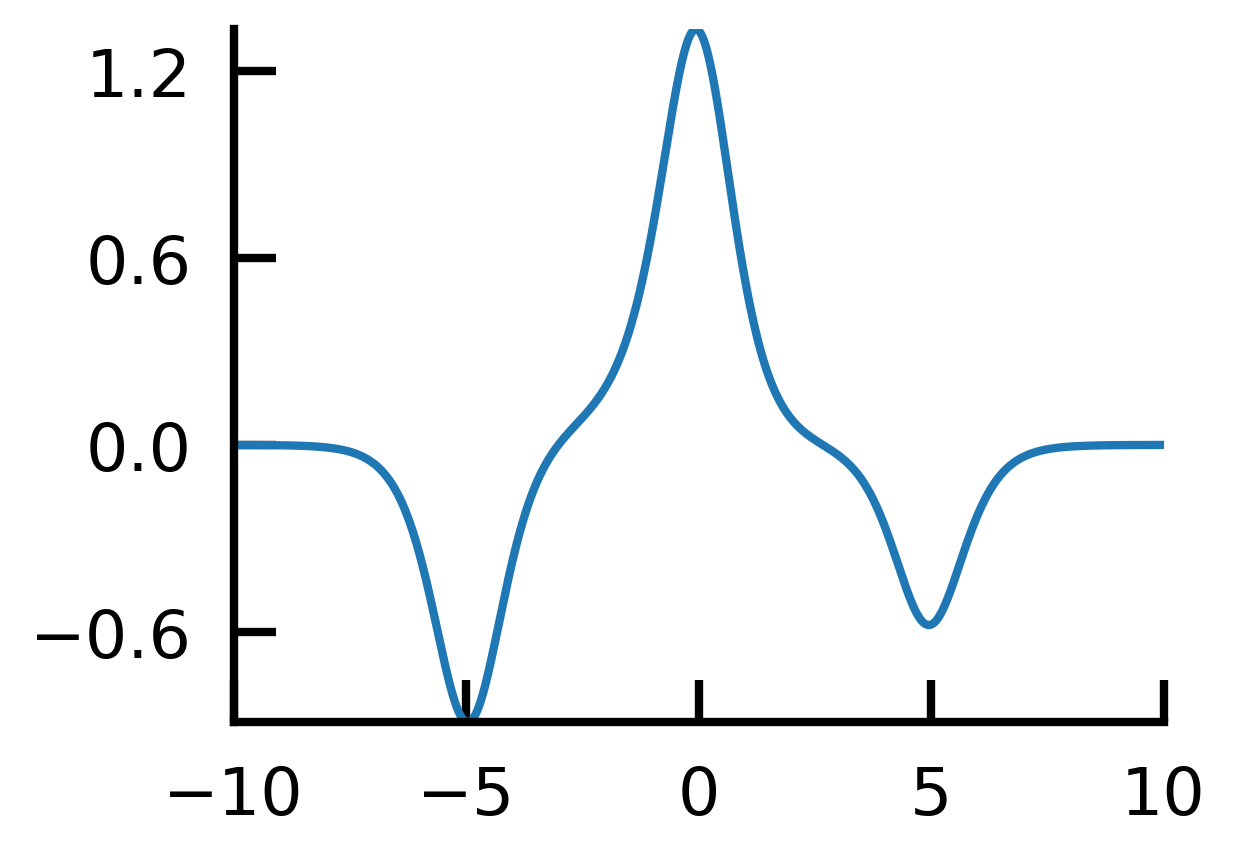

In [13]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(u, hlog_pdf_z_u, linewidth=2)
apply_style(ax1)
# ax1.set_xlim([-100,100])
# ax1.set_ylim([-900, 600])
# ax1.set_xticks([0, 0.5, 1])
# ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "KS_u_hess_log_pdf.svg", bbox_inches='tight')
plt.show()

### Continuous Bernoulli

In [14]:
# Continuous Bernoulli PDF
from numpy import arctan


def continuous_bernoulli_pdf(x, omega):
    """
    Continuous Bernoulli PDF.
    """
    return  omega** x * (1 - omega) ** (1 - x) * (2*np.arctan(1-2*omega))/(1-2*omega) if omega != 1 else 1

def log_cb_pdf(x, lam):
    return np.log2(continuous_bernoulli_pdf(x, lam))

def log_grad_cb_pdf(x, lam):
    return np.log2(lam / (1-lam))

# Define x values for plotting
x_vals = np.linspace(1e-4, 1 - 1e-4, 1000)

# Continuous Bernoulli parameters
lam = 0.01  # Example lambda value
print(np.log2(lam / (1-lam)))
cb_pdf = [continuous_bernoulli_pdf(x, lam) for x in x_vals]
log_cb = [log_cb_pdf(x, lam) for x in x_vals]
grad_log_cb = [log_grad_cb_pdf(x, lam) for x in x_vals]
print(log_cb)


-6.6293566200796095
[np.float64(0.6468057523429712), np.float64(0.6401710869288015), np.float64(0.6335364215146316), np.float64(0.626901756100462), np.float64(0.620267090686292), np.float64(0.6136324252721224), np.float64(0.6069977598579527), np.float64(0.6003630944437829), np.float64(0.5937284290296132), np.float64(0.5870937636154433), np.float64(0.5804590982012735), np.float64(0.5738244327871039), np.float64(0.5671897673729341), np.float64(0.5605551019587646), np.float64(0.5539204365445943), np.float64(0.5472857711304248), np.float64(0.540651105716255), np.float64(0.5340164403020851), np.float64(0.5273817748879154), np.float64(0.5207471094737456), np.float64(0.514112444059576), np.float64(0.5074777786454061), np.float64(0.5008431132312364), np.float64(0.49420844781706647), np.float64(0.4875737824028969), np.float64(0.4809391169887275), np.float64(0.4743044515745574), np.float64(0.46766978616038757), np.float64(0.46103512074621783), np.float64(0.4544004553320483), np.float64(0.4477657

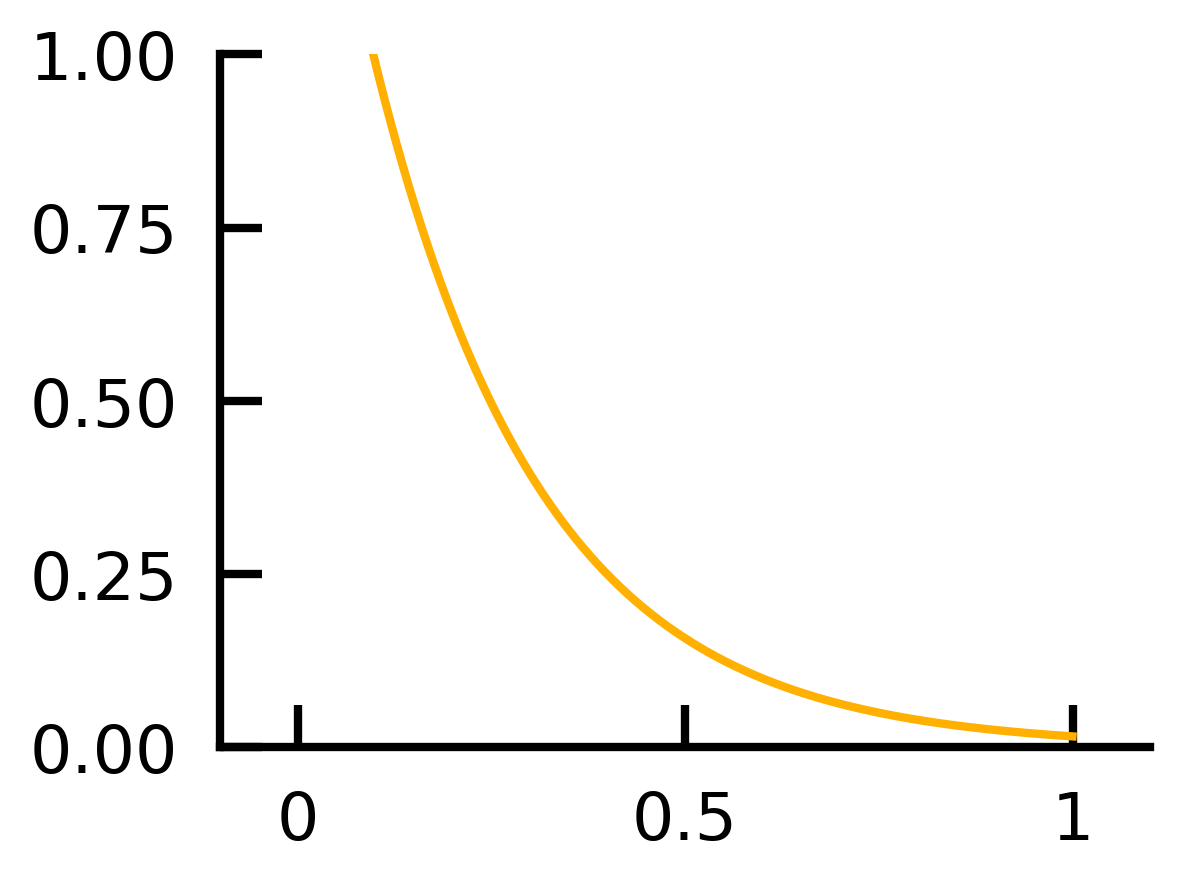

In [15]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(x_vals, cb_pdf, linewidth=2, color="#FFB000")
apply_style(ax1)
ax1.set_xlim([-0.1,1.1])
ax1.set_ylim([0, 1])
ax1.set_xticks([0, 0.5, 1])
ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "CB_pdf.svg", bbox_inches='tight')
plt.show()

log CB prior

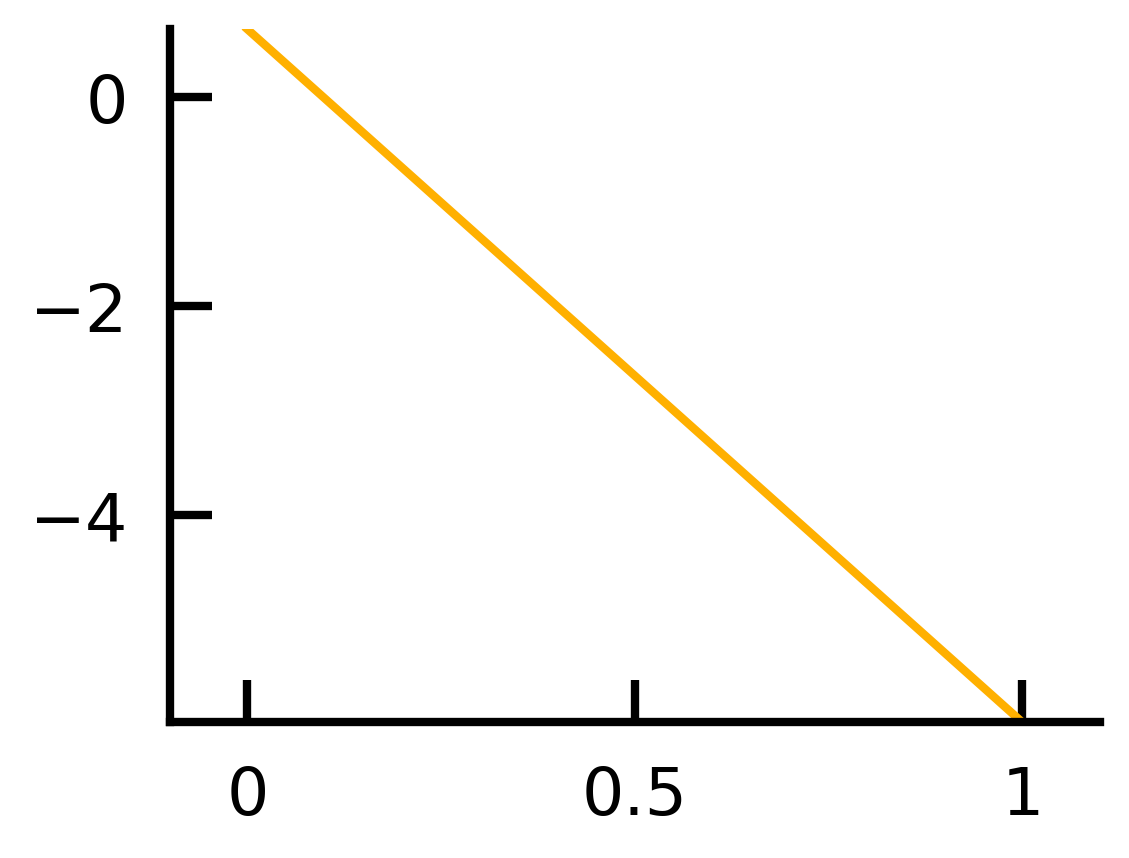

In [16]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(x_vals, log_cb, linewidth=2, color="#FFB000")
apply_style(ax1)
ax1.set_xlim([-0.1,1.1])
# ax1.set_ylim([0, 10])
ax1.set_xticks([0, 0.5, 1])
ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "CB_log_pdf.svg", bbox_inches='tight')
plt.show()

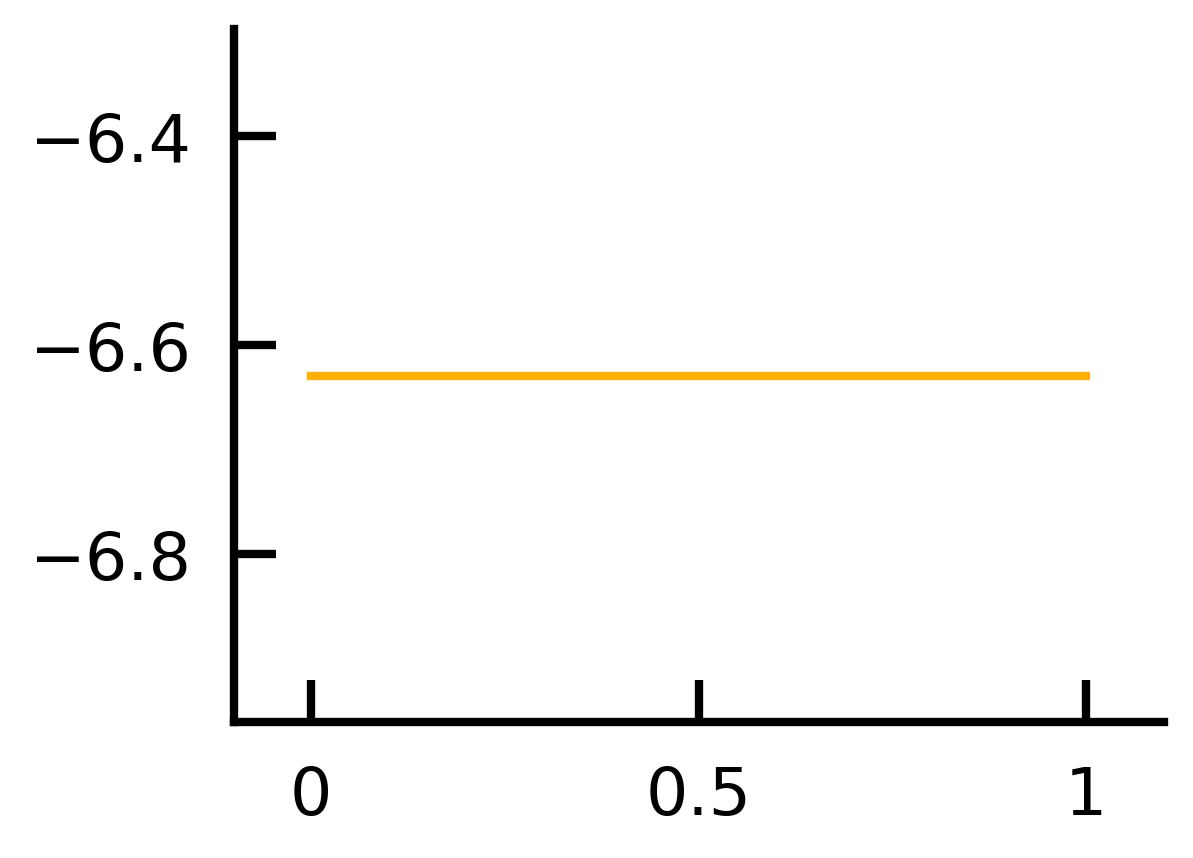

In [17]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(x_vals, grad_log_cb, linewidth=2, color="#FFB000")
apply_style(ax1)
ax1.set_xlim([-0.1,1.1])
# ax1.set_ylim([0, 10])
ax1.set_xticks([0, 0.5, 1])
ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "CB_grad_log_pdf.svg", bbox_inches='tight')
plt.show()

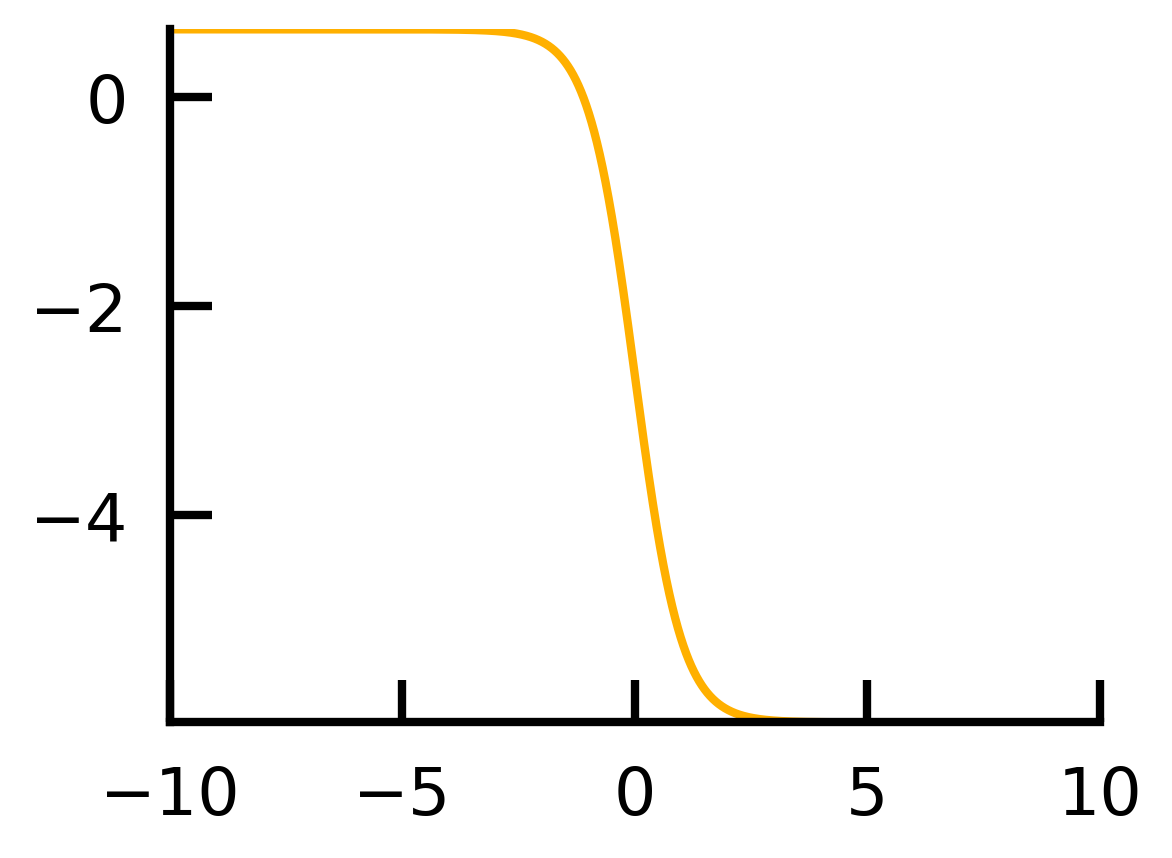

In [18]:
# u = np.linspace(-10, 10, 1000)
gamma_val = 2


cb_pdf = [continuous_bernoulli_pdf(x, lam) for x in sig]
cb_pdf = np.log2(cb_pdf)
# log_cb = [log_cb_pdf(x, lam) for x in x_vals]

fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(u, cb_pdf, linewidth=2, color="#FFB000")
apply_style(ax1)
# ax1.set_xlim([-4,4])
# ax1.set_ylim([0, 2])
# ax1.set_xticks([0, 0.5, 1])
# ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "CB_u_pdf.svg", bbox_inches='tight')
plt.show()

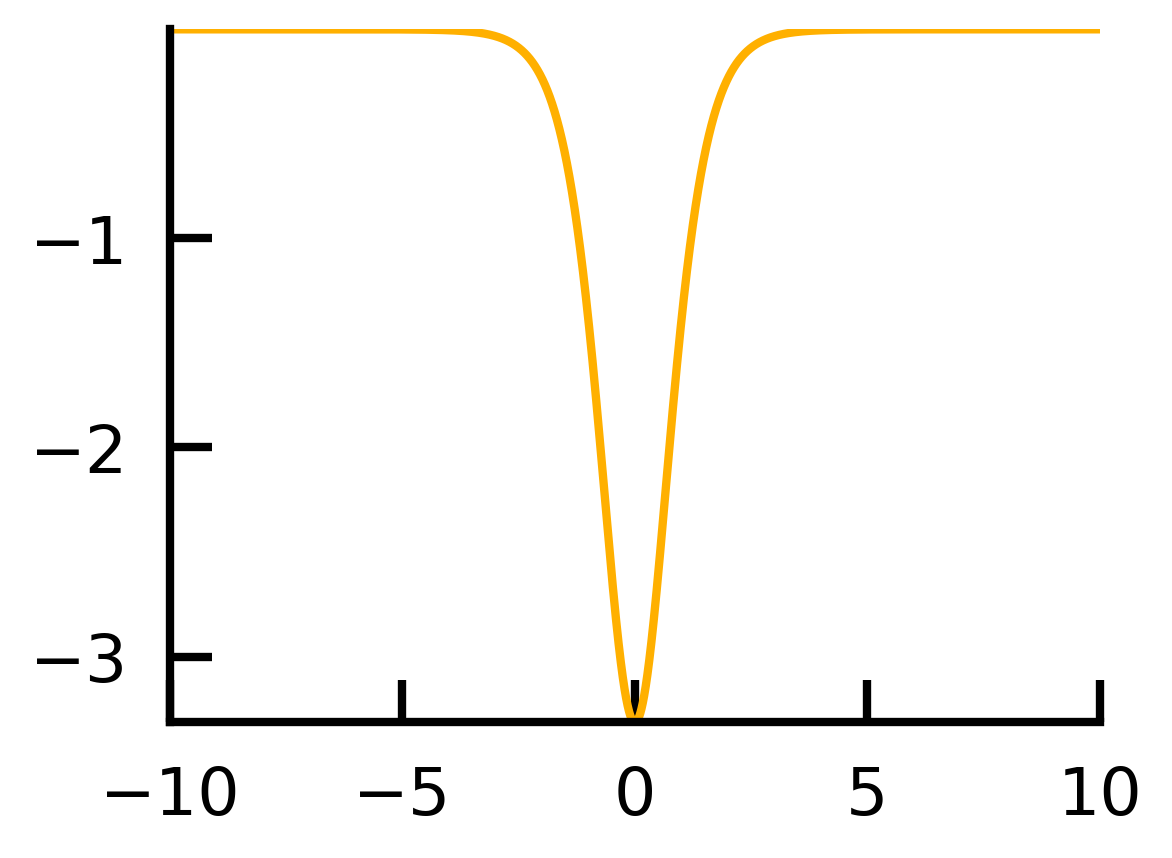

In [19]:
# u = np.linspace(-10, 10, 1000)
gamma_val = 2


cb_pdf = [continuous_bernoulli_pdf(x, lam) for x in sig]
cb_pdf = np.log2(cb_pdf)
# log_cb = [log_cb_pdf(x, lam) for x in x_vals]
grad_log_cb_u = [log_grad_cb_pdf(x, lam) for x in sig] * sigp * gamma_val

fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(u, grad_log_cb_u, linewidth=2, color="#FFB000")
apply_style(ax1)
# ax1.set_xlim([-4,4])
# ax1.set_ylim([0, 2])
# ax1.set_xticks([0, 0.5, 1])
# ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "CB_u_grad_pdf.svg", bbox_inches='tight')
plt.show()

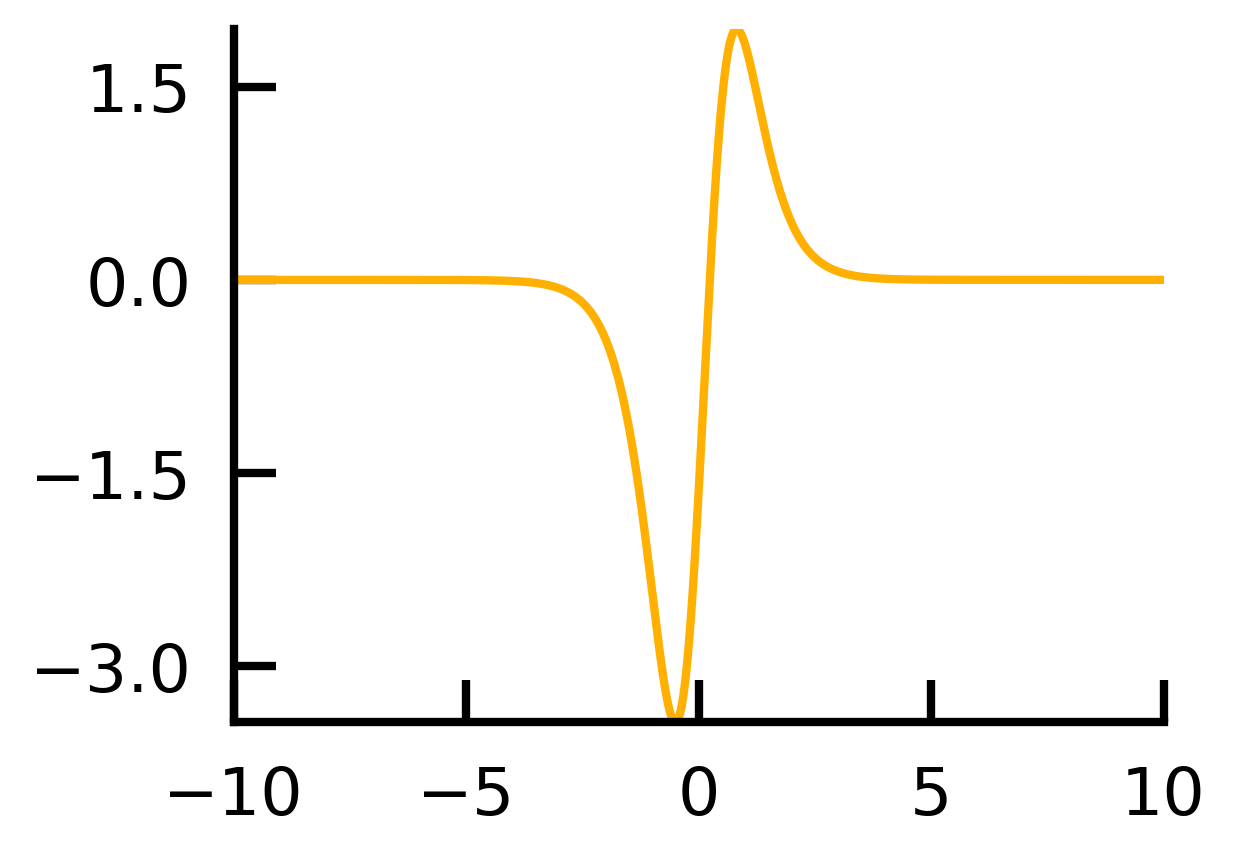

In [20]:
# x = x_from_z_1                                 # should be: scale * sig
# term1 = dist.hess_log_pdf(x) * (scale**2) * (gamma_val**2) * (sigp**2)
# term2 = dist.grad_log_pdf(x)  *  scale        * (gamma_val**2) *  sigpp

hess_log_cb_u = [log_grad_cb_pdf(x, lam) for x in sig] * sigp **2 * gamma_val**2 + log_grad_cb_pdf(x, lam) * sigpp * gamma_val **2

fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(u, hess_log_cb_u, linewidth=2, color="#FFB000")
apply_style(ax1)
# ax1.set_xlim([-4,4])
# ax1.set_ylim([0, 2])
# ax1.set_xticks([0, 0.5, 1])
# ax1.set_xticklabels(["0", "0.5", "1"])
ax1.figure.savefig(output_dir / "CB_u_hess_pdf.svg", bbox_inches='tight')
plt.show()